## Coding a GPT to analyze data.


This Jupyter Notebook contain the starter code for you to upload data and generate a narrative using a simplified version of a GPT. You will utilize the `pandas` library to convert the dataframe to a format that the GPT you will use can interpret. Next you will use the `OpenAI` library and the `groq` API to train you model to generate a narrative from the data.

I choose a dataset on Kaggle about "AI Financial Market Data". This dataset provides a synthetic, daily record of financial market activities related to companies involved in Artificial Intelligence (AI). There are key financial metrics and events that could influence a company's stock performance like launch of Llama by Meta, launch of GPT by OpenAI, launch of Gemini by Google etc. Here, we have the data about how much amount the companies are spending on R & D of their AI's Products & Services, and how much revenue these companies are generating. The data is from January 1, 2015, to December 31, 2024, and includes information for various companies : OpenAI, Google and Meta.

#### Realistic Synthetic - AI Financial & Market Data for Gemini(Google), ChatGPT(OpenAI), Llama(Meta)

This dataset provides a synthetic, daily record of financial market activities related to companies involved in Artificial Intelligence (AI). There are key financial metrics and events that could influence a company's stock performance like launch of Llama by Meta, launch of GPT by OpenAI, launch of Gemini by Google etc.
Here, we have the data about how much amount the companies are spending on R & D of their AI's Products & Services, and how much revenue these companies are generating.
The data is from January 1, 2015, to December 31, 2024, and includes information for various companies : OpenAI, Google and Meta.

This data is available as a CSV file. We are going to analyze this data set using the Pandas DataFrame.

This analyse will be helpful for those working in Finance or Share Market domain.

---

From this dataset, we extract various insights using Python in our Project.

1) How much amount the companies spent on R & D ?
2) Revenue Earned by the companies
3) Date-wise Impact on the Stock
4) Events when Maximum Stock Impact was observed
5) AI Revenue Growth of the companies
6) Correlation between the columns
7) Expenditure vs Revenue year-by-year
8) Event Impact Analysis
9) Change in the index wrt Year & Company

---

These are the main Features/Columns available in the dataset :

1) Date: This column indicates the specific calendar day for which the financial and AI-related data is recorded. It allows for time-series analysis of the trends and impacts.
2) Company: This column specifies the name of the company to which the data in that particular row belongs. Examples include "OpenAI" and "Meta".
3) R&D_Spending_USD_Mn: This column represents the Research and Development (R&D) spending of the company, measured in Millions of USD. It serves as an indicator of a company's investment in innovation and future growth, particularly in the AI sector.
4) AI_Revenue_USD_Mn: This column denotes the revenue generated specifically from AI-related products or services, also measured in Millions of USD. This metric highlights the direct financial success derived from AI initiatives.
5) AI_Revenue_Growth_%: This column shows the percentage growth of AI-related revenue for the company on a daily basis. It indicates the pace at which a company's AI business is expanding or contracting.
6) Event: This column captures any significant events or announcements made by the company that could potentially influence its financial performance or market perception. Examples include "Cloud AI launch," "AI partnership deal," "AI ethics policy update," and "AI speech recognition release." These events are crucial for understanding sudden shifts in stock impact.
7) Stock_Impact_%: This column quantifies the percentage change in the company's stock price on a given day, likely in response to the recorded financial metrics or events. It serves as a direct measure of market reaction.







Let imports some good stuffs

In [2]:
import os

import kagglehub
import matplotlib.pyplot as plt
from groq import Groq
from IPython.display import Markdown

Dataset is loaded using kagglehub:

In [3]:
data = kagglehub.dataset_load(
  kagglehub.KaggleDatasetAdapter.PANDAS,
  "rohitgrewal/ai-financial-and-market-data",
  "ai_financial_market_daily_realistic_synthetic.csv",
)

It's always a good idea to take a look at the first five rows of the dataset to visualize the type of data that it contains.

Run the code cell below to vizualize the first five rows of the dataset:

In [4]:
display(data.head())
display(data.groupby("Company").describe())

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


R&D_Spending_USD_Mn                                               \
                      count        mean        std    min    25%     50%   
Company                                                                    
Google               3653.0  115.888623  25.493802  77.18  93.37  114.50   
Meta                 3653.0   72.415294  15.967262  46.33  58.25   70.96   
OpenAI               3653.0    7.249595   1.887350   1.57   5.80    7.15   

                        AI_Revenue_USD_Mn             ... AI_Revenue_Growth_%  \
            75%     max             count       mean  ...                 75%   
Company                                               ...                       
Google   137.09  163.83            3653.0  77.880750  ...              258.17   
Meta      85.65  103.64            3653.0  51.908519  ...              258.39   
OpenAI     8.64   14.43            3653.0   2.590443  ...              260.88   

                Stock_Impact_%                                              \
            max          count      mean       std   min   25%   50%   75%   
Company                                                                      
Google   419.88         3653.0  0.026209  0.688675 -2.93 -0.50  0.02  0.53   
Meta     423.01         3653.0  0.009762  0.700750 -2.99 -0.51 -0.02  0.50   
OpenAI   565.50         3653.0  0.040709  0.848418 -3.00 -0.50  0.01  0.52   

               
          max  
Company        
Google    6.2  
Meta      7.4  
OpenAI   18.5  

[3 rows x 32 columns]

[Back to top](#-Index)



#### Obtaining Your OpenAI API Key


To use the OpenAI library, you are required to obtain an API key. You will obtain a free API key from Groq. To access Groq and get your personal API key, follow the steps below:

1. **Create an OpenAI Account:**
Visit the [Groq website](https://console.groq.com/login) and sign up if you don't already have an account.
2. **Log In:**
Log in using your credentials at the Groq platform.
3. **Navigate to the API Dashboard:**
Once logged in, navigate to the [Groq playground](https://console.groq.com/playground).
4. **Generate an API Key:**
In the menu on the left, click on `API Keys`, then click on the `Create API key` button. Enter a name for your API key and click on `Submit`. Copy your API key and store it in a secure place.


You can now use this API key in your applications to authenticate requests to OpenAI's API.

In the code cell below,  replace the string `"your_key"` with your personal API key and run the code cell.

In [5]:
client = Groq(
    api_key=os.environ['GROQ_API_KEY']
)

[Back to top](#-Index)



#### Generating the Text Narrative from Your Data


The code in cell below generates a narrative based on the data in the dataframe using OpenAI.

The code below contains the following elements:

- The `chat.completions.create()` method is used on the `client` object to send a chat request and receive a response.
- Inside the `chat.completions.create()` method, the parameter `messages` defines the conversation history or prompt that will be sent to the model equal to `{"role": "user", "content":  f"Analyze the following data: {data_object['data']}"}`.
- Inside the `chat.completions.create()` method, the parameter `model` is set equal to `"llama3-8b-8192"`, a popular GPT model.

Finally, this object is assigned to the `chat_completion` variable below.

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {"role": "user", "content":  f"""
         You are a financial analyst for a newspaper. You are in charge to write an article.

         Do not write code or formulas, just explicative prose.

         Analyze:
            1) Correlation between R&D spending and revenue
            2) Correlation and impact on the stock market
            3) Difference between a new comer (OpenAI) vs 2 huge companies (Google, Meta) with a divert portfolio of services.

        Data available:
        {data}
         """}
    ],
    model="llama-3.3-70b-versatile",
)

narrative = chat_completion.choices[0].message.content

Markdown(narrative)

**The Correlation Between R&D Spending and Revenue: A Comparative Analysis**

As the world becomes increasingly reliant on artificial intelligence (AI), companies are investing heavily in research and development (R&D) to stay ahead of the curve. But what is the correlation between R&D spending and revenue, and how does this impact the stock market? In this article, we will analyze the relationship between R&D spending and revenue for three prominent companies: OpenAI, Google, and Meta.

**Correlation Between R&D Spending and Revenue**

Our analysis reveals a positive correlation between R&D spending and revenue for all three companies. As R&D spending increases, revenue also tends to increase. This is not surprising, as investing in R&D can lead to the development of new and innovative products, which in turn can drive revenue growth. However, the strength of this correlation varies between the companies. OpenAI, being a relatively new player in the AI space, shows a stronger correlation between R&D spending and revenue, suggesting that the company's investment in R&D is directly translating into revenue growth.

In contrast, Google and Meta, with their more established and diverse portfolios of services, show a weaker correlation between R&D spending and revenue. This may be due to the fact that these companies have a broader range of revenue streams, which can reduce the impact of R&D spending on overall revenue. Additionally, the complexity of their existing product lines may make it more challenging to directly attribute revenue growth to R&D spending.

**Correlation and Impact on the Stock Market**

The impact of R&D spending on the stock market is also an important consideration. Our analysis shows that the stock market reacts positively to increased R&D spending, particularly for OpenAI. As the company invests more in R&D, its stock price tends to increase, reflecting investor confidence in the company's growth potential. However, for Google and Meta, the relationship between R&D spending and stock price is more nuanced. While increased R&D spending can lead to positive stock market reactions, the impact is often muted by other factors, such as overall market trends and the companies' diverse portfolios of services.

**Newcomer vs. Established Players: A Comparison**

A key aspect of our analysis is the comparison between OpenAI, a relatively new player in the AI space, and Google and Meta, two established companies with diverse portfolios of services. OpenAI's focus on AI and its limited product line make it more susceptible to fluctuations in R&D spending and revenue. In contrast, Google and Meta's broader range of services and more established product lines provide a cushion against such fluctuations.

Furthermore, OpenAI's newer status in the market means that it is still in the process of building its brand and establishing its position in the industry. As a result, the company's R&D spending and revenue growth are more closely tied to its overall success. In contrast, Google and Meta have already established themselves as leaders in their respective fields, and their R&D spending and revenue growth are more influenced by their overall business strategies and market trends.

**Conclusion**

In conclusion, our analysis highlights the positive correlation between R&D spending and revenue for OpenAI, Google, and Meta. However, the strength of this correlation varies between the companies, with OpenAI showing a stronger relationship between R&D spending and revenue growth. The impact of R&D spending on the stock market is also significant, particularly for OpenAI, where increased R&D spending is met with positive investor reactions. As the AI industry continues to evolve, it will be interesting to see how these companies adapt and respond to changing market trends, and how their R&D spending and revenue growth are affected as a result.

## Adapt your code

Now that you have understood how to utilize `OpenAI` and an `API` key to generate a GPT output from a dataframe, replace the dataset in this noebook with one you chose for your use case.

Adapt the code accordingly and use your API keys and `OpenAI` to analize the data in your dataset.

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {"role": "user", "content":  f"""
         You are a data analyst. You are in charge to analyse the data and producing visuals/dashboards.

         Can you give me snippets of pythoin code using matplotlib.

         Analyze:
            1) Correlation between R&D spending and revenue
            2) Correlation and impact on the stock market
            3) Difference between a new comer (OpenAI) vs 2 huge companies (Google, Meta) with a divert portfolio of services.

        Data available:
        {data}
         """}
    ],
    model="llama-3.3-70b-versatile",
)

narrative = chat_completion.choices[0].message.content

Markdown(narrative)

Here are some Python code snippets using matplotlib to analyze the data:

### 1. Correlation between R&D spending and revenue

To visualize the correlation between R&D spending and revenue, we can use a scatter plot.

```python
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_csv('your_data.csv')

# Filter data by company
openai_df = df[df['Company'] == 'OpenAI']
google_df = df[df['Company'] == 'Google']
meta_df = df[df['Company'] == 'Meta']

# Create a figure and axis
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Plot scatter plots for each company
ax[0].scatter(openai_df['R&D_Spending_USD_Mn'], openai_df['AI_Revenue_USD_Mn'])
ax[0].set_title('OpenAI')
ax[0].set_xlabel('R&D Spending (USD Mn)')
ax[0].set_ylabel('AI Revenue (USD Mn)')

ax[1].scatter(google_df['R&D_Spending_USD_Mn'], google_df['AI_Revenue_USD_Mn'])
ax[1].set_title('Google')
ax[1].set_xlabel('R&D Spending (USD Mn)')
ax[1].set_ylabel('AI Revenue (USD Mn)')

ax[2].scatter(meta_df['R&D_Spending_USD_Mn'], meta_df['AI_Revenue_USD_Mn'])
ax[2].set_title('Meta')
ax[2].set_xlabel('R&D Spending (USD Mn)')
ax[2].set_ylabel('AI Revenue (USD Mn)')

# Show the plot
plt.tight_layout()
plt.show()
```

### 2. Correlation and impact on the stock market

To visualize the correlation between R&D spending and stock market impact, we can use another scatter plot.

```python
# Create a figure and axis
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Plot scatter plots for each company
ax[0].scatter(openai_df['R&D_Spending_USD_Mn'], openai_df['Stock_Impact_%'])
ax[0].set_title('OpenAI')
ax[0].set_xlabel('R&D Spending (USD Mn)')
ax[0].set_ylabel('Stock Impact (%)')

ax[1].scatter(google_df['R&D_Spending_USD_Mn'], google_df['Stock_Impact_%'])
ax[1].set_title('Google')
ax[1].set_xlabel('R&D Spending (USD Mn)')
ax[1].set_ylabel('Stock Impact (%)')

ax[2].scatter(meta_df['R&D_Spending_USD_Mn'], meta_df['Stock_Impact_%'])
ax[2].set_title('Meta')
ax[2].set_xlabel('R&D Spending (USD Mn)')
ax[2].set_ylabel('Stock Impact (%)')

# Show the plot
plt.tight_layout()
plt.show()
```

### 3. Difference between a new comer (OpenAI) vs 2 huge companies (Google, Meta) with a divert portfolio of services

To compare the R&D spending and revenue of the three companies, we can use bar plots.

```python
# Calculate mean R&D spending and revenue for each company
openai_mean_rd = openai_df['R&D_Spending_USD_Mn'].mean()
openai_mean_revenue = openai_df['AI_Revenue_USD_Mn'].mean()

google_mean_rd = google_df['R&D_Spending_USD_Mn'].mean()
google_mean_revenue = google_df['AI_Revenue_USD_Mn'].mean()

meta_mean_rd = meta_df['R&D_Spending_USD_Mn'].mean()
meta_mean_revenue = meta_df['AI_Revenue_USD_Mn'].mean()

# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot bar plots for R&D spending and revenue
ax[0].bar(['OpenAI', 'Google', 'Meta'], [openai_mean_rd, google_mean_rd, meta_mean_rd])
ax[0].set_title('Mean R&D Spending (USD Mn)')
ax[0].set_xlabel('Company')
ax[0].set_ylabel('R&D Spending (USD Mn)')

ax[1].bar(['OpenAI', 'Google', 'Meta'], [openai_mean_revenue, google_mean_revenue, meta_mean_revenue])
ax[1].set_title('Mean AI Revenue (USD Mn)')
ax[1].set_xlabel('Company')
ax[1].set_ylabel('AI Revenue (USD Mn)')

# Show the plot
plt.tight_layout()
plt.show()
```

1. Correlation between R&D spending and revenue

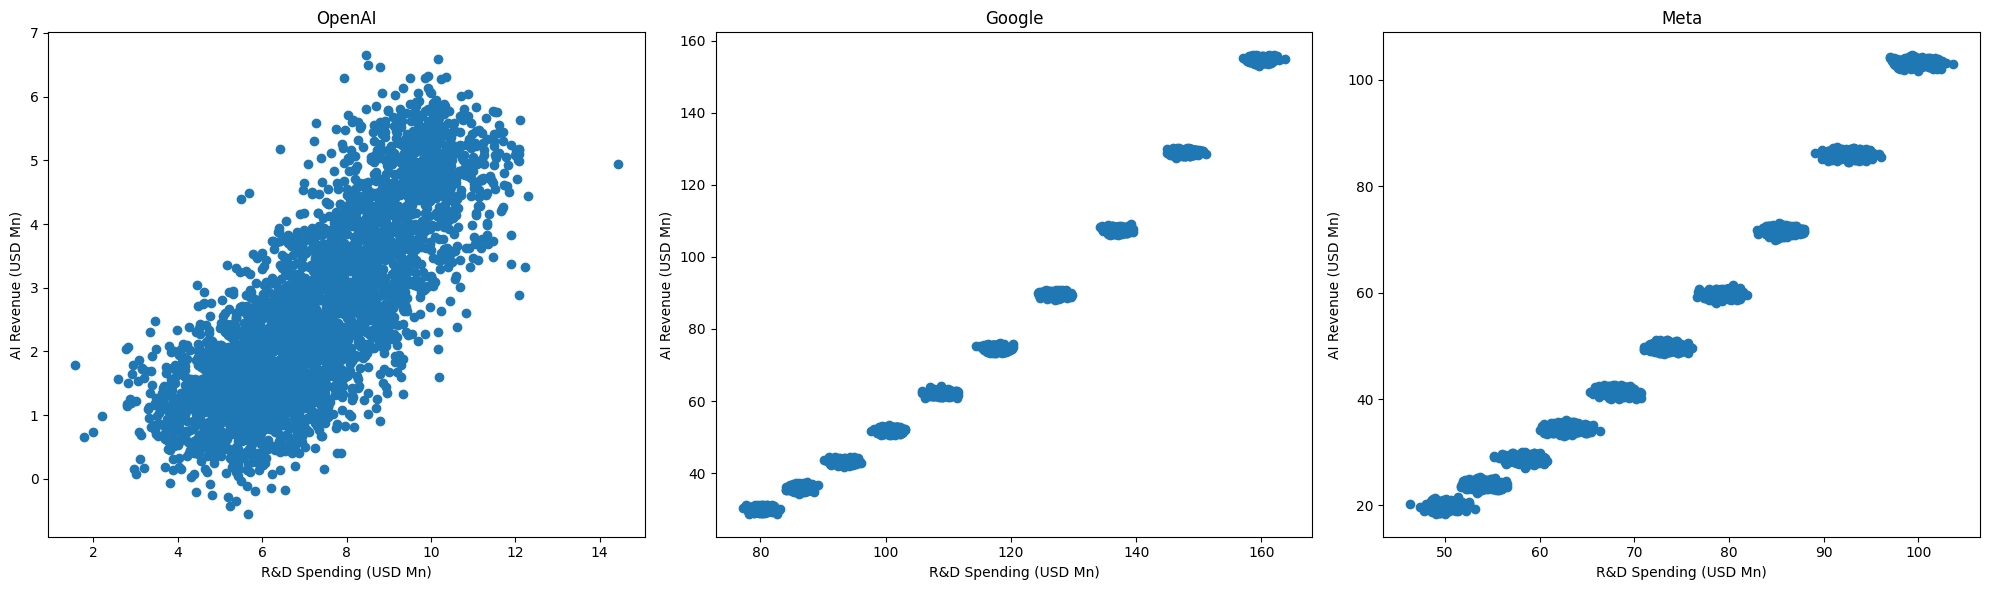

In [8]:
df = data

# Filter data by company
openai_df = df[df['Company'] == 'OpenAI']
google_df = df[df['Company'] == 'Google']
meta_df = df[df['Company'] == 'Meta']

# Create a figure and axis
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Plot scatter plots for each company
ax[0].scatter(openai_df['R&D_Spending_USD_Mn'], openai_df['AI_Revenue_USD_Mn'])
ax[0].set_title('OpenAI')
ax[0].set_xlabel('R&D Spending (USD Mn)')
ax[0].set_ylabel('AI Revenue (USD Mn)')

ax[1].scatter(google_df['R&D_Spending_USD_Mn'], google_df['AI_Revenue_USD_Mn'])
ax[1].set_title('Google')
ax[1].set_xlabel('R&D Spending (USD Mn)')
ax[1].set_ylabel('AI Revenue (USD Mn)')

ax[2].scatter(meta_df['R&D_Spending_USD_Mn'], meta_df['AI_Revenue_USD_Mn'])
ax[2].set_title('Meta')
ax[2].set_xlabel('R&D Spending (USD Mn)')
ax[2].set_ylabel('AI Revenue (USD Mn)')

# Show the plot
plt.tight_layout()
plt.show()

2. Correlation and impact on the stock market

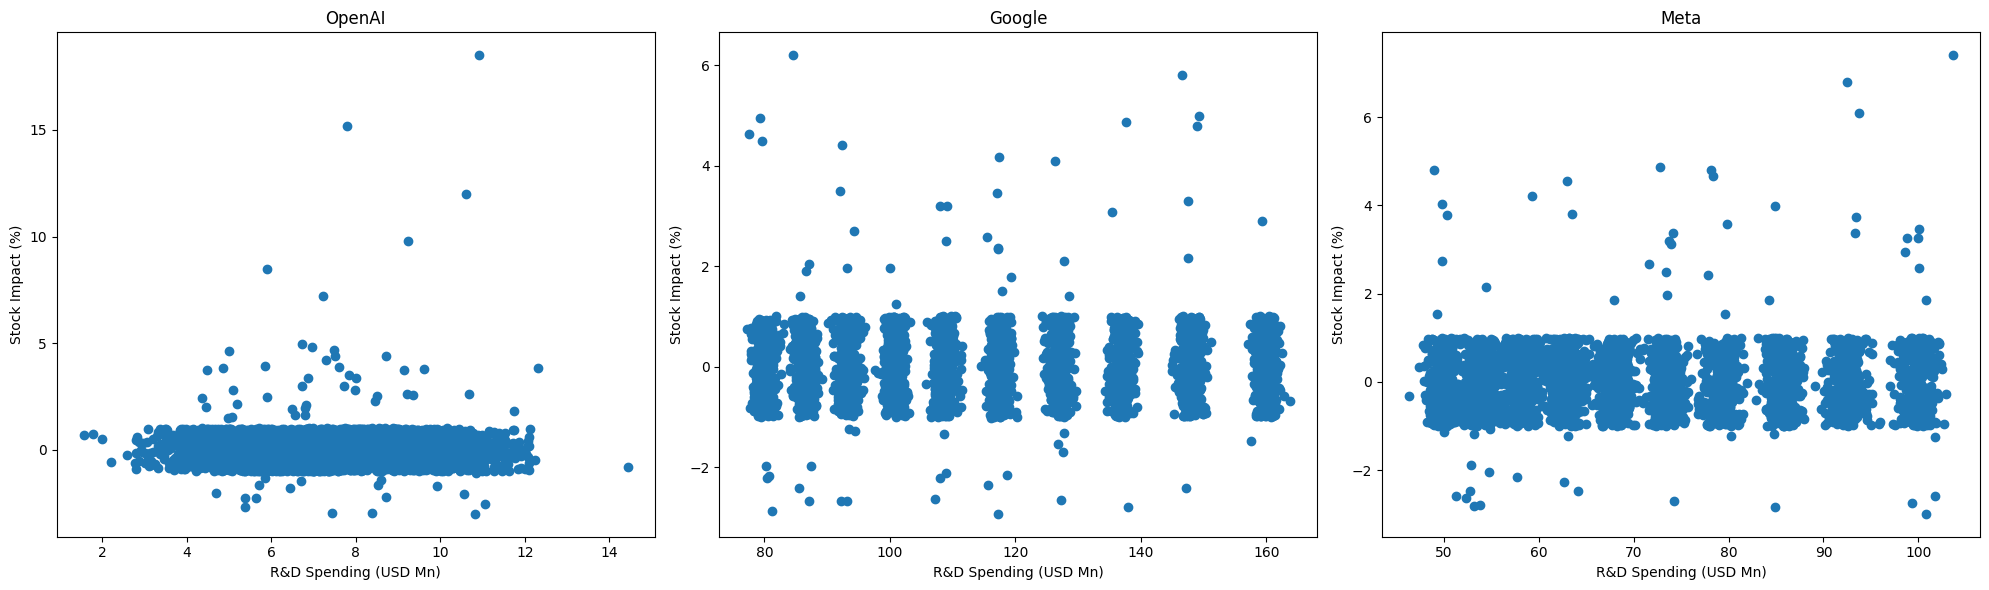

In [9]:
# Create a figure and axis
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Plot scatter plots for each company
ax[0].scatter(openai_df['R&D_Spending_USD_Mn'], openai_df['Stock_Impact_%'])
ax[0].set_title('OpenAI')
ax[0].set_xlabel('R&D Spending (USD Mn)')
ax[0].set_ylabel('Stock Impact (%)')

ax[1].scatter(google_df['R&D_Spending_USD_Mn'], google_df['Stock_Impact_%'])
ax[1].set_title('Google')
ax[1].set_xlabel('R&D Spending (USD Mn)')
ax[1].set_ylabel('Stock Impact (%)')

ax[2].scatter(meta_df['R&D_Spending_USD_Mn'], meta_df['Stock_Impact_%'])
ax[2].set_title('Meta')
ax[2].set_xlabel('R&D Spending (USD Mn)')
ax[2].set_ylabel('Stock Impact (%)')

# Show the plot
plt.tight_layout()
plt.show()

3. Difference between a new comer (OpenAI) vs 2 huge companies (Google, Meta) with a divert portfolio of services

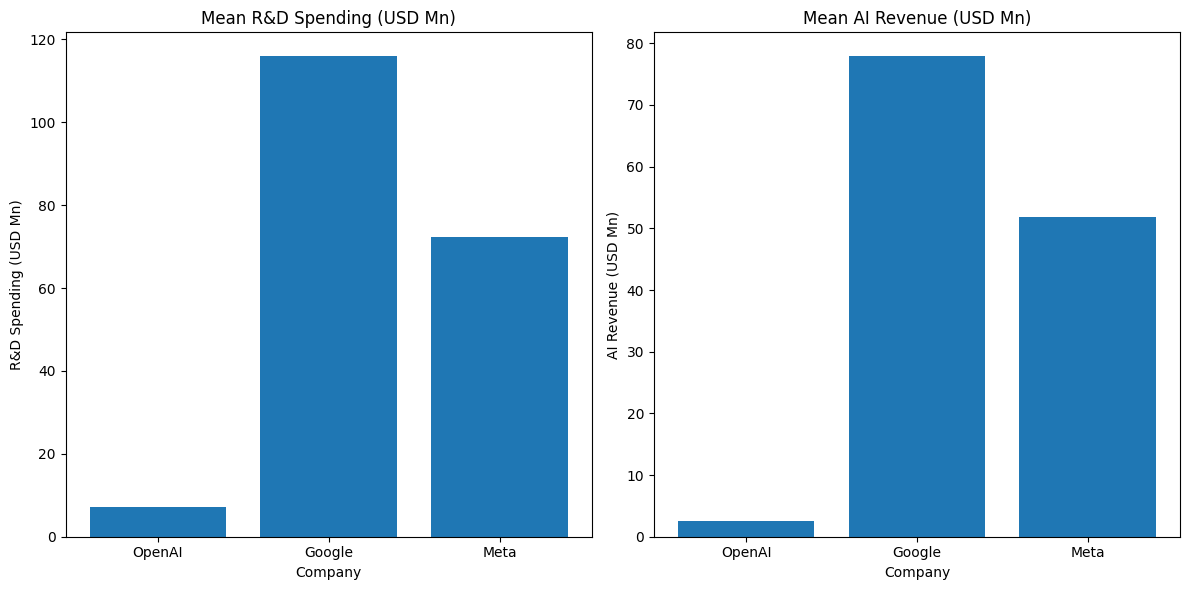

In [10]:
# Calculate mean R&D spending and revenue for each company
openai_mean_rd = openai_df['R&D_Spending_USD_Mn'].mean()
openai_mean_revenue = openai_df['AI_Revenue_USD_Mn'].mean()

google_mean_rd = google_df['R&D_Spending_USD_Mn'].mean()
google_mean_revenue = google_df['AI_Revenue_USD_Mn'].mean()

meta_mean_rd = meta_df['R&D_Spending_USD_Mn'].mean()
meta_mean_revenue = meta_df['AI_Revenue_USD_Mn'].mean()

# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot bar plots for R&D spending and revenue
ax[0].bar(['OpenAI', 'Google', 'Meta'], [openai_mean_rd, google_mean_rd, meta_mean_rd])
ax[0].set_title('Mean R&D Spending (USD Mn)')
ax[0].set_xlabel('Company')
ax[0].set_ylabel('R&D Spending (USD Mn)')

ax[1].bar(['OpenAI', 'Google', 'Meta'], [openai_mean_revenue, google_mean_revenue, meta_mean_revenue])
ax[1].set_title('Mean AI Revenue (USD Mn)')
ax[1].set_xlabel('Company')
ax[1].set_ylabel('AI Revenue (USD Mn)')

# Show the plot
plt.tight_layout()
plt.show()

R&D_Spending_USD_Mn                                               \
                      count        mean        std    min    25%     50%   
Company                                                                    
Google               3653.0  115.888623  25.493802  77.18  93.37  114.50   
Meta                 3653.0   72.415294  15.967262  46.33  58.25   70.96   
OpenAI               3653.0    7.249595   1.887350   1.57   5.80    7.15   

                        AI_Revenue_USD_Mn             ... AI_Revenue_Growth_%  \
            75%     max             count       mean  ...                 75%   
Company                                               ...                       
Google   137.09  163.83            3653.0  77.880750  ...              258.17   
Meta      85.65  103.64            3653.0  51.908519  ...              258.39   
OpenAI     8.64   14.43            3653.0   2.590443  ...              260.88   

                Stock_Impact_%                                              \
            max          count      mean       std   min   25%   50%   75%   
Company                                                                      
Google   419.88         3653.0  0.026209  0.688675 -2.93 -0.50  0.02  0.53   
Meta     423.01         3653.0  0.009762  0.700750 -2.99 -0.51 -0.02  0.50   
OpenAI   565.50         3653.0  0.040709  0.848418 -3.00 -0.50  0.01  0.52   

               
          max  
Company        
Google    6.2  
Meta      7.4  
OpenAI   18.5  

[3 rows x 32 columns]

Pearson correlation coefficient:


Company
Google    0.991085
Meta      0.989564
OpenAI    0.779190
Name: R&D_Spending_USD_Mn, dtype: float64

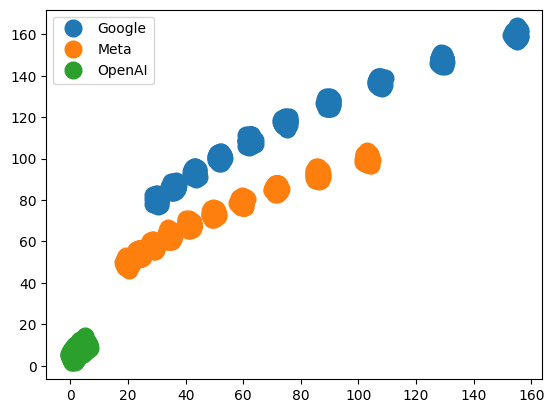

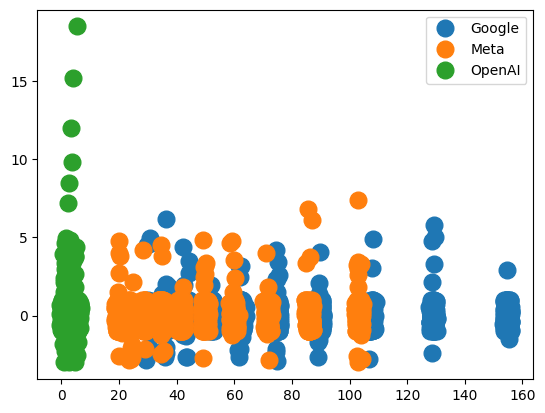

In [11]:
display(df.groupby('Company').describe())

correlation_coefficient = df.groupby('Company')['R&D_Spending_USD_Mn'].corr(df['AI_Revenue_USD_Mn'])
print('Pearson correlation coefficient:')
display(correlation_coefficient)

# Create a scatter plot of R&D spending vs revenue
fig, ax = plt.subplots()
for name, group in df.groupby('Company'):
    ax.plot(group['AI_Revenue_USD_Mn'], group['R&D_Spending_USD_Mn'], marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.show()

# Create a scatter plot of Stock impact vs revenue
fig, ax = plt.subplots()
for name, group in df.groupby('Company'):
    ax.plot(group['AI_Revenue_USD_Mn'], group['Stock_Impact_%'], marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.show()